In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1:

*When conducting a gravity survey, are positioning requirements for latitude
correction more severe at lower latitudes than at middle latitudes? At higher latitudes than
middle latitudes? Use your preferred plotting technique (e.g., Excel, Python, etc.), and the
geodetic reference system formula of 1967 in the class textbook to justify your response.*

In [2]:
# variables
g_obs = 980658.67 # mGal ? 
g_n = 980674.39 # mGal ? 

lat_list = [0, 45.62, 89.5] # degrees
elevation = 100.24 # meters. Also called z
bouger_density = 2.67 # g_cm-3. Also called rho
FA_corr = 30.93
B_corr = 11.22
FA_anom = 15.22
B_anom = 4.00

delta_gb = []

In [3]:
delta_g = g_obs - g_n + FA_corr - B_corr
delta_g

3.9900000000279388

In [4]:
# GRS67 Equation 6.28
# final units in mGal
for i in lat_list:
    delta_g = g_obs - (g_n * (1 + 0.005278895 * math.sin(math.radians(i))**2 + 0.000023462 * math.sin(math.radians(i))**4)) + ((0.3086 - (0.04193 * bouger_density)) * elevation)
    delta_gb.append(delta_g)

print(delta_gb)


[3.9918852560279383, -2646.465307187865, -5195.4960953647915]


Most of the terms compute to zero when latidude is zero. As latidude approaches the poles (90 degrees) the sin value get closer to 1

In [5]:
math.sin(math.radians(90))

1.0

In [6]:
csv_file = 'dial_readings.csv'
dial_df = pd.read_csv(csv_file)

In [7]:
dial_df["time"] = pd.to_datetime(dial_df["time"], format = '%H:%M')
time_diff = np.diff(dial_df['time'])

In [8]:
times = np.insert(time_diff, 0, 0)
nano_sec = 1e-9


In [9]:
#dial_df['time_min'] = times * nano_sec
time_min = np.arange(times[0] * nano_sec,times[-1] * nano_sec,10)

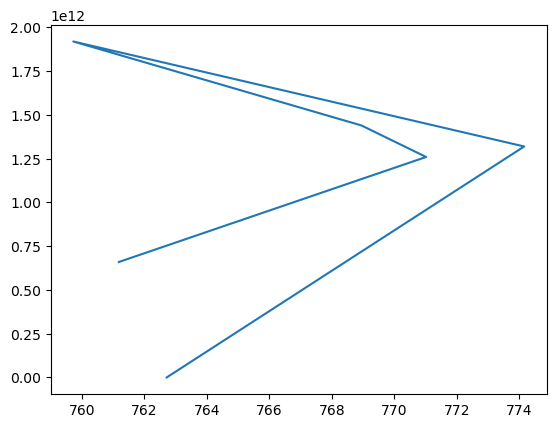

In [ ]:
plt.scatter(dial_df['dial_reading'],times)